<a href="https://colab.research.google.com/github/ViejoLoco27/probando_relaciones_con_regresion_lineal/blob/main/actividad_analisis_y_modelado_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad:**
#Análisis y selección de modelos de regresión lineal.

Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

* Análisis inicial con el PairPlot de Seaborn

* Construir modelos de regresión lineal

* Realizar la comparación de estos modelos

##**Importando los datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
datos_hoteles = pd.read_csv('/content/datos_hoteles.csv')

In [3]:
#Renombrar columnas
datos_hoteles = datos_hoteles.rename(columns={
    'Estrelas':'Estrellas',
    'ProximidadeTurismo':'Distancia_zonas_turísticas',
    'Capacidade':'Capacidad_de_huespedes',
    'Preco':'Precio'
})

In [4]:
datos_hoteles

,Estrellas,Distancia_zonas_turísticas,Capacidad_de_huespedes,Precio
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087
...,...,...,...,...
995,5,11.277836,2,374.823064
996,4,8.811311,2,323.147993
997,2,10.329892,4,409.372235
998,2,9.239120,3,434.881278


##**Visualización de datos**

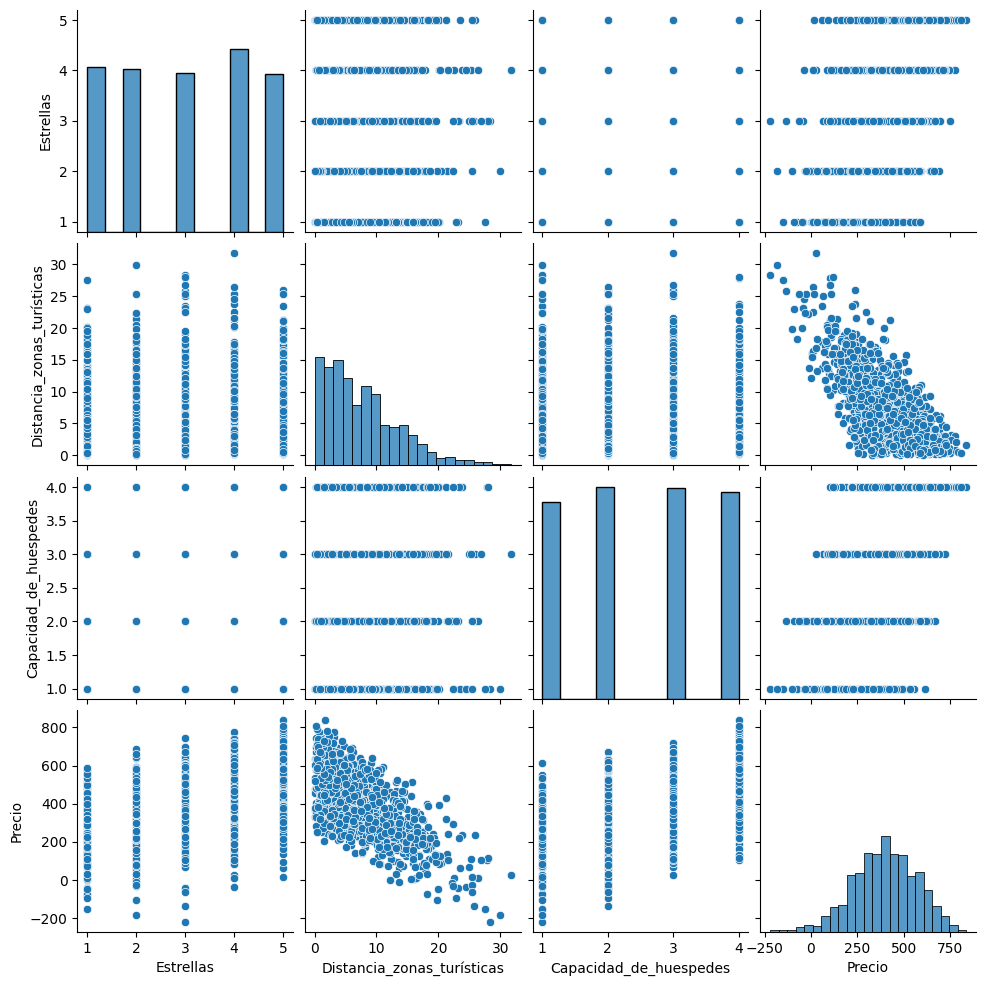

In [5]:
#Visualización de relaciones entre las variables
sns.pairplot(datos_hoteles)

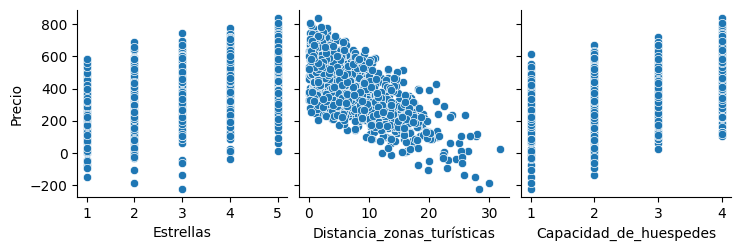

In [6]:
sns.pairplot(datos_hoteles, y_vars='Precio',x_vars=['Estrellas', 'Distancia_zonas_turísticas', 'Capacidad_de_huespedes'])

In [7]:
corr = datos_hoteles.corr()
corr['Estrellas']

,Estrellas
Estrellas,1.000000
Distancia_zonas_turísticas,0.005237
Capacidad_de_huespedes,-0.023200
Precio,0.401099


In [8]:
# Generar una mpascara para el triángulo superior
mascara = np.zeros_like(corr, dtype = bool)
mascara[np.triu_indices_from(mascara)] = True
mascara

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

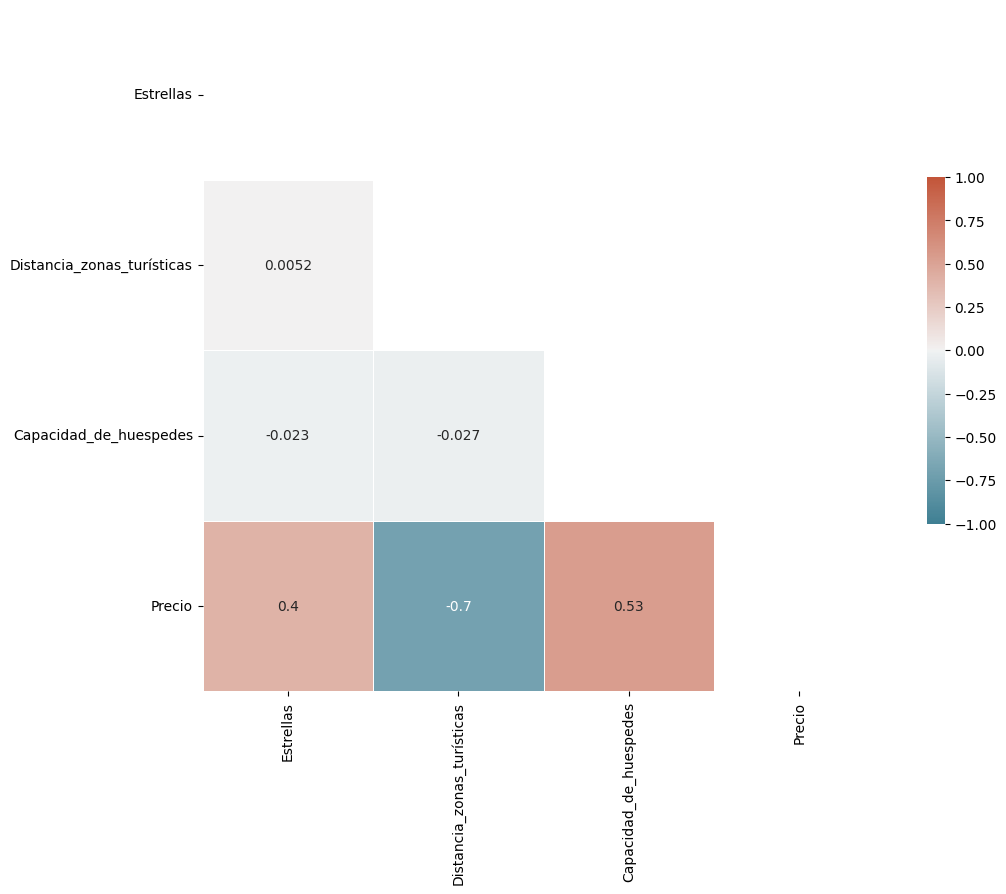

In [9]:
#Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11,9))
#Generar el mapa de calor
cmap = sns.diverging_palette(220,20,as_cmap=True)

sns.heatmap (corr, mask = mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
             square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.5})
plt.show()

In [10]:
px.scatter(datos_hoteles,x='Estrellas',y='Precio',
           trendline_color_override='red',trendline='ols')

In [11]:
px.scatter(datos_hoteles,x='Distancia_zonas_turísticas',y='Precio',
           trendline_color_override='red',trendline='ols')

/tmp/ipython-input-12-3662528260.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




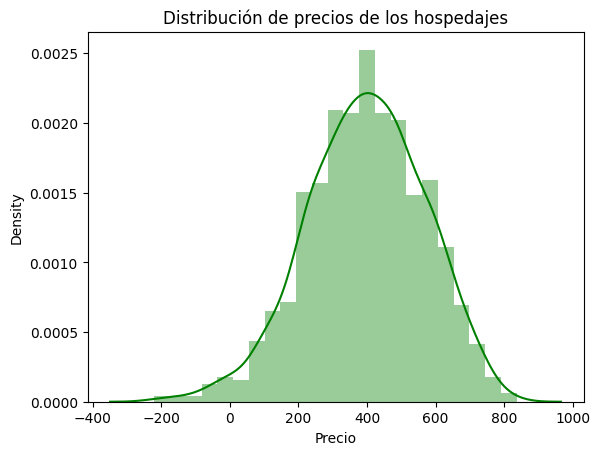

In [12]:
sns.distplot(datos_hoteles['Precio'], kde=True, color='green')
plt.title('Distribución de precios de los hospedajes')
plt.show()

/tmp/ipython-input-13-2808557994.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




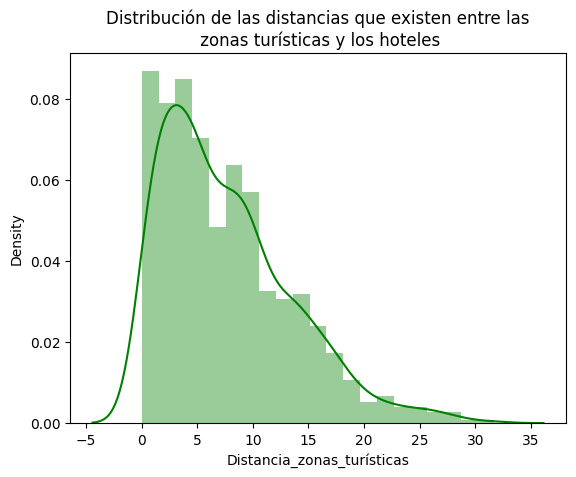

In [13]:
sns.distplot(datos_hoteles['Distancia_zonas_turísticas'], kde=True, color='green')
plt.title('Distribución de las distancias que existen entre las\n zonas turísticas y los hoteles')
plt.show()

##**Entrenamiento del modelo predictivo**

In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
#Datos de entrenamiento para usar la fórmula
#Recordar que el random_state sirve para garantizar la reproductibilidad de la segregación de datos
y = datos_hoteles['Precio']
X = datos_hoteles.drop(columns='Precio')

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.30,random_state=230)

#Generando el data frame de entrenamiento
df_train = pd.DataFrame(X_train)
df_train['Precio_hospedaje']= y_train

In [16]:
df_train

,Estrellas,Distancia_zonas_turísticas,Capacidad_de_huespedes,Precio_hospedaje
740,5,9.724029,3,445.356134
182,4,14.893560,4,371.505950
39,4,2.524966,1,436.534270
29,4,16.709430,2,236.329362
221,2,0.229598,1,354.218636
...,...,...,...,...
271,2,8.656529,4,493.091117
723,5,7.113064,1,378.997559
560,3,16.485040,2,246.338917
999,4,14.121517,4,466.005780


##**Generación y comprobación de modelos regresivos**

In [17]:
import statsmodels.api as sm

In [18]:
X_train = sm.add_constant(X_train)
X_train.head()

,const,Estrellas,Distancia_zonas_turísticas,Capacidad_de_huespedes
740,1.0,5,9.724029,3
182,1.0,4,14.893560,4
39,1.0,4,2.524966,1
29,1.0,4,16.709430,2
221,1.0,2,0.229598,1


In [19]:
X_train.columns

Index(['const', 'Estrellas', 'Distancia_zonas_turísticas',
       'Capacidad_de_huespedes'],
      dtype='object')

In [20]:
# Modelo de regresión (con todas las variables) saturado
modelo_1 = sm.OLS(y_train,X_train[['const', 'Estrellas', 'Distancia_zonas_turísticas',
       'Capacidad_de_huespedes']]).fit()

In [21]:
# Modelo de regresión Precio v.s. distancia de hoteles respecto a las zonas turísticas
modelo_2 = sm.OLS(y_train,X_train[['const','Distancia_zonas_turísticas']]).fit()

In [22]:
# Modelo de regresión Precio v.s. Capacidad de huéspedes
modelo_3 = sm.OLS(y_train,X_train[['const',
       'Capacidad_de_huespedes']]).fit()

In [23]:
# Modelo de regresión Precio v.s. Rank de estrellas
modelo_4 = sm.OLS(y_train,X_train[['const', 'Estrellas']]).fit()

In [25]:
# Resumen del modelos
modelos_regresivos = [modelo_1,modelo_2,modelo_3,modelo_4]

for i,j in enumerate(modelos_regresivos):
  print(f'\n\n***********************************************************************************\n**********************El modelo {i} tiene el siguiente resumen:**********************\n***********************************************************************************\n\n')
  print(j.summary())



***********************************************************************************
**********************El modelo 0 tiene el siguiente resumen:**********************
***********************************************************************************


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:28:44   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Type:            nonro

In [27]:
for i,j in enumerate(modelos_regresivos):
  print(f'El coeficiente de determinación R^2 de l modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinación R^2 de l modelo 0: 0.92
El coeficiente de determinación R^2 de l modelo 1: 0.49
El coeficiente de determinación R^2 de l modelo 2: 0.28
El coeficiente de determinación R^2 de l modelo 3: 0.15


In [28]:
modelo_1.params

,0
const,195.157575
Estrellas,50.503055
Distancia_zonas_turísticas,-20.356643
Capacidad_de_huespedes,81.526144


#**Conclusión:**


##**Interpretación de gráficos**
---

En la fase de exploración de los datos mediante los recursos de visualización, se observa que la correlación es la que se encuentra entre la variable precio con respecto a la distancia de zonas turísticas.  

Al considerar esta relación se observa que esta correlación es negativa, en efecto, esto significa que a menor distancia de los hoteles respecto a las zonas turísticas, mayor es el precio del hospedaje.

Por otra parte, se analizaron dos histogramas para concer la distribución de los precios y la distribución de la variable que captura la distancia de los hoteles respecto a las zonas turísticas. Al realizar este ejercicio se observó que la distribución de precios es muy parecida a una distribución normal, es decir es una distribución aproximada a la simetría, lo que en efecto significa que los precios de los hoteles son en promedio muy similares. Respecto a la distribución de las distancias, se apreció una distribución asimétrica positiva. Esto quiere que, gran cantidad de hoteles se concentran en zonas turísticas.

##**Generación y comparación de modelos**
---

Se generaron cuatro modelos regresivos:

Modelo_1: Este modelo contempla todas varaibles comparadas con el precio.

Modelo_2: Este modelo contempla la comparación de la variable distancia_zonas_turísticas.

Modelo_: Este modelo contempla la comparación de la variable capacidad_de_huéspedes contra el precio.

Modelo_1: Este modelo contempla la comparación de la variable Estrellas contra el precio.

Al respecto de la comparación de estos modelos se destaca que el modelo_1 posee el coeficiente R^2 más alto:

##**Coeficientes R^2**

El coeficiente de determinación R^2 de l modelo 1: 0.92
El coeficiente de determinación R^2 de l modelo 2: 0.49
El coeficiente de determinación R^2 de l modelo 3: 0.28
El coeficiente de determinación R^2 de l modelo 4: 0.15

##**Multicolinealidad**

No existe multicolinealidad entre las variables.



